# Učitavanje biblioteka

In [107]:
#Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter


# Preprocesuiranje podataka

Preprocesurianje podataka se svodi na nekoliko koraka:

1. Balansiranje podataka. (Undersampling)
2. Kodiranje string vrednosti. (LabelEncoding)
3. Skaliranje podataka.
4. Split podataka na trening i test set.

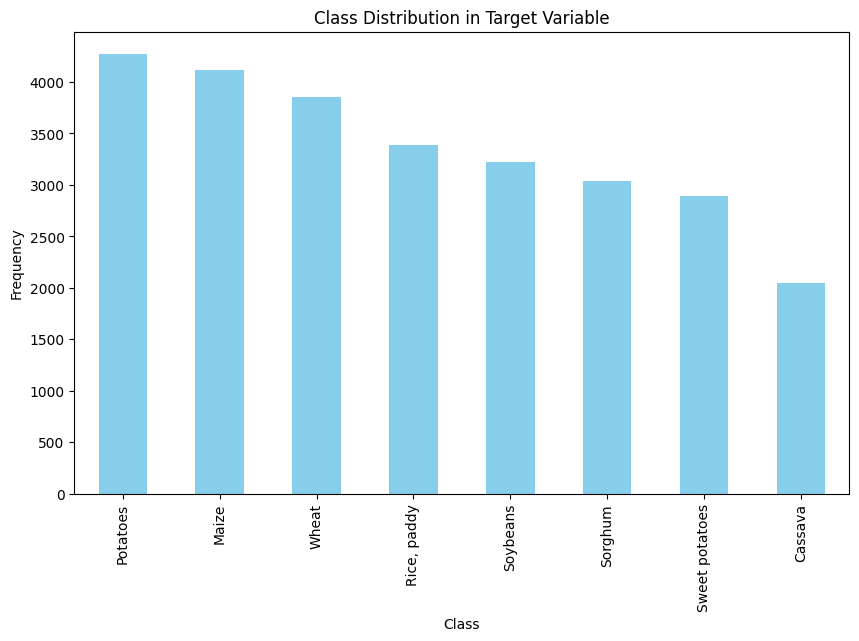

In [127]:
#Import the dataset
df = pd.read_csv('datasets/yield_df.csv')
df = df.drop(columns=['Year','Unnamed: 0'])

# Remove mintority 'Item' classes
df = df[df['Item'] != 'Yams']
df = df[df['Item'] != 'Plantains and others']

# Visualize class distribution
target_counts = df['Item'].value_counts()

plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [128]:
#Label encode string columns
label_encoder = LabelEncoder()

df['Area'] = label_encoder.fit_transform(df['Area'])
df['Item'] = label_encoder.fit_transform(df['Item'])

# Splitting data into features and target
y = df['hg/ha_yield']
X_orig = df.drop(columns=['hg/ha_yield'])

# Scalling the data
scaler = StandardScaler()
X = scaler.fit_transform(X_orig,y)

#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=37)

# Treniranje razlicitih modela

Treniranje je rađeno sa nekoliko različitih regresionih algoritama. Pre svega je uzeta linearna regresija (Nije efikasana, uzeta kao kontrolni algoritam). Ručnom analizom podataka je ustanovljena jasna korelacija između tipa useva i količine, samim tim za rad su uzeti algoritmi: 

- DecisionTreeRegressor
- RandomForestRegressor
- Bernoulli Naive Bayes

Algoritmi su dali visok procenat uspešnosti, mada bojaznost od overfitting-a postoji zbog prirode algoritama i zbog samog dataset-a.

Preciznost algoritma može se videti kroz score u odnosu na test set podataka ili vizuelno kroz historgram vrednosti razlike (residual). (što više vrednosti cirkuliše oko 0, algoritam je precizniji, nedostatak distribucije može da ukaže na overfitting)

12.106248362982496


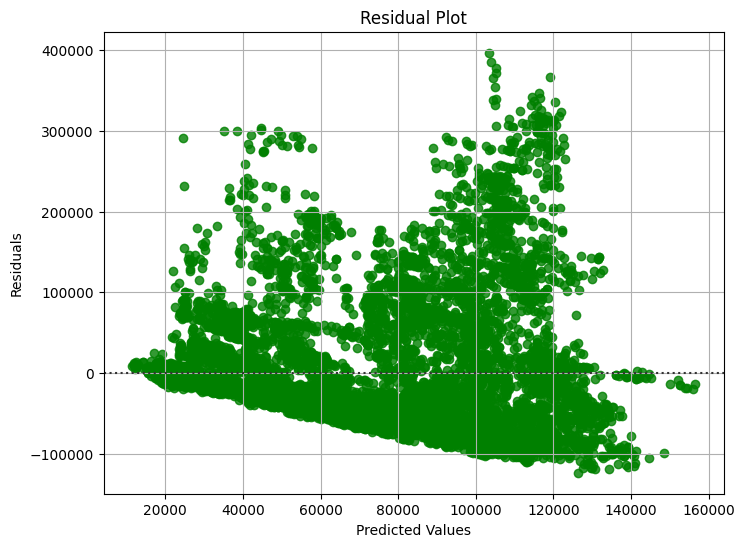

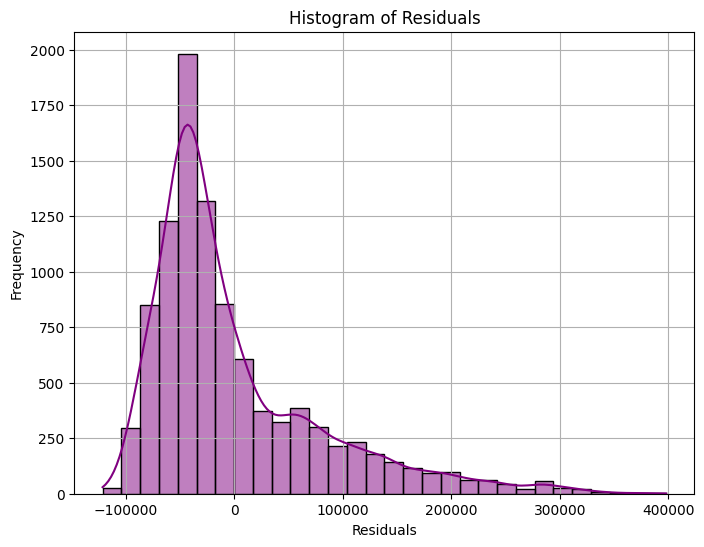

In [129]:
#Linear regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_score = lr_model.score(X_test,y_test)
print(lr_score * 100)

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

95.83451600427728


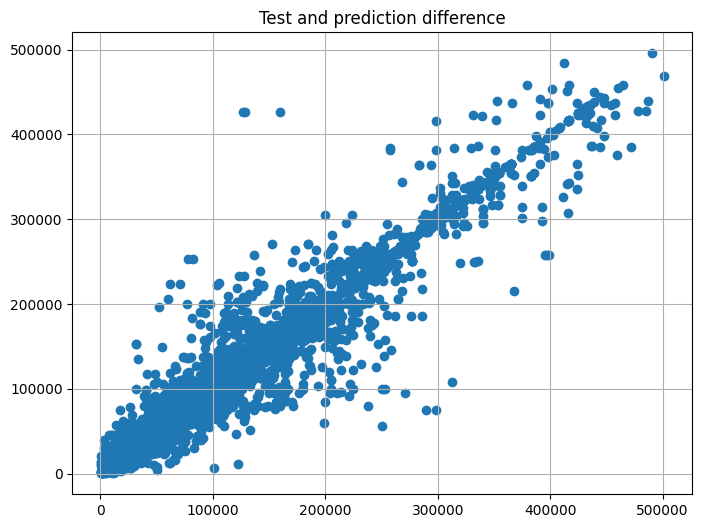

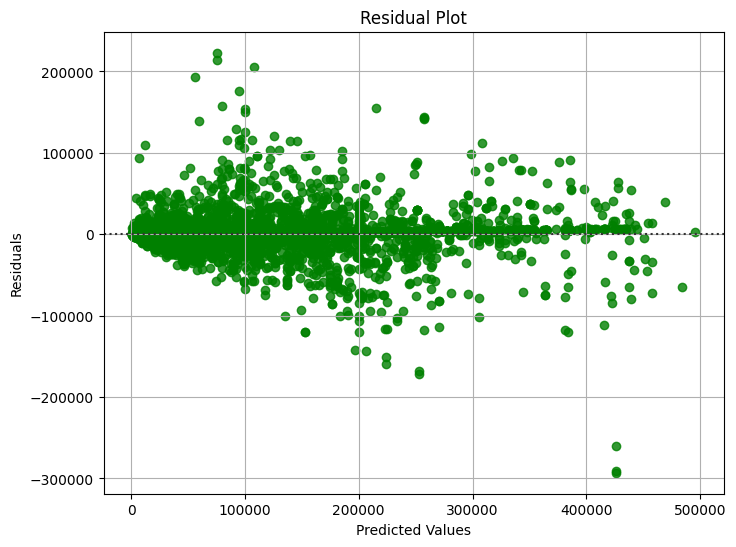

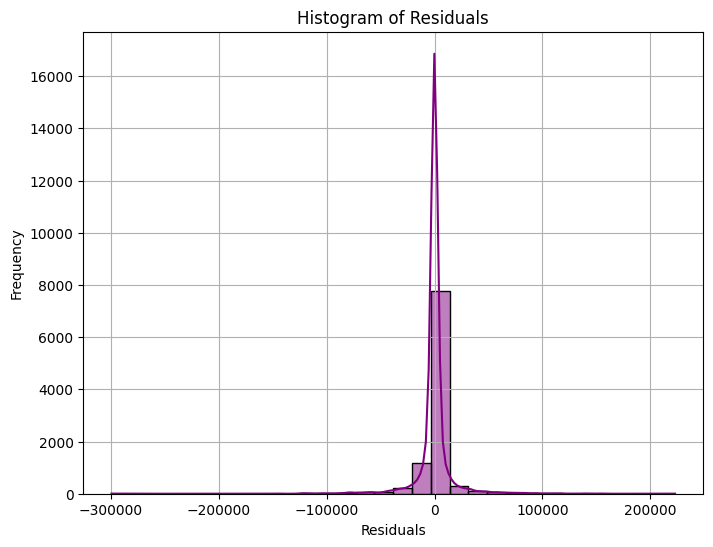

In [130]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

#Only hyperparameter set is the function tthat measures the quality of a split.
dtr_model = DecisionTreeRegressor(criterion='friedman_mse')

dtr_model.fit(X_train,y_train)
BernoulliNB
y_pred = dtr_model.predict(X_test)

dtr_score = dtr_model.score(X_test,y_test)
print(dtr_score * 100)

plt.figure(figsize=(8, 6))
plt.title("Test and prediction difference")
plt.scatter(y_test,y_pred)
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

97.45593556692161


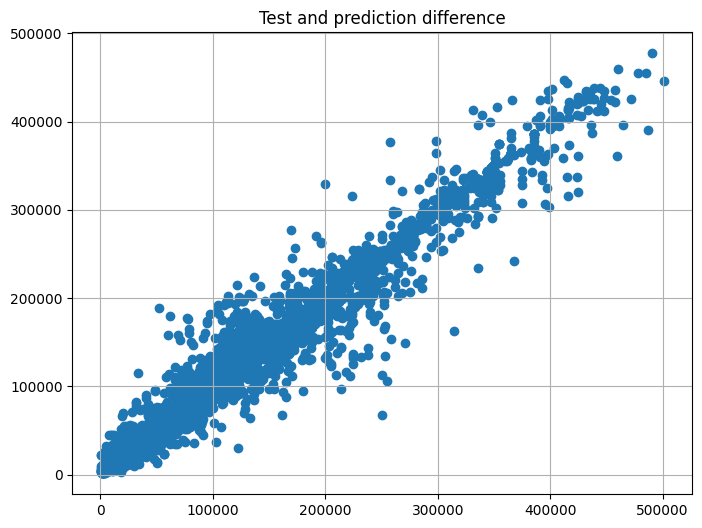

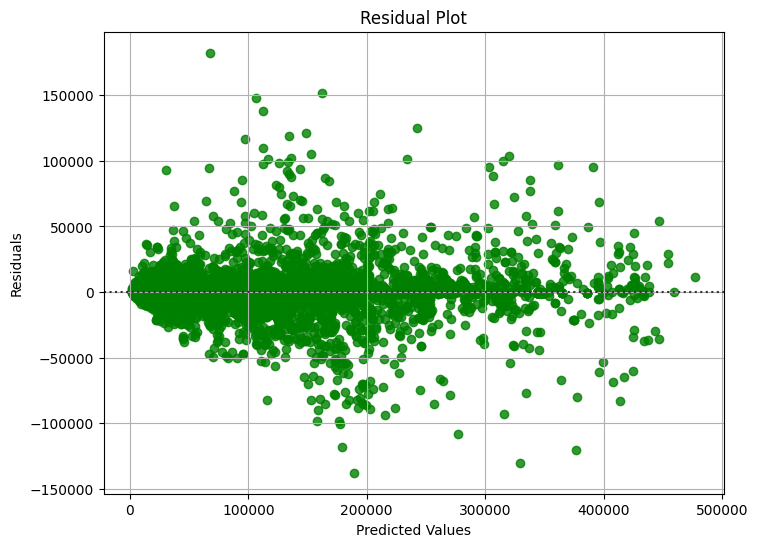

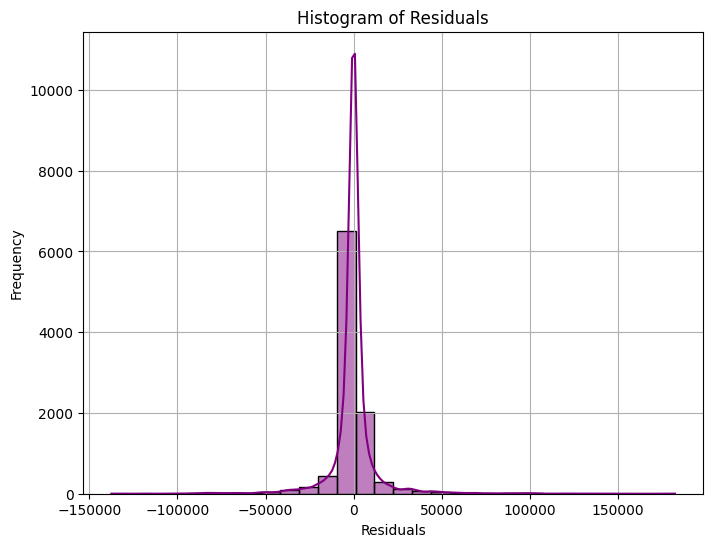

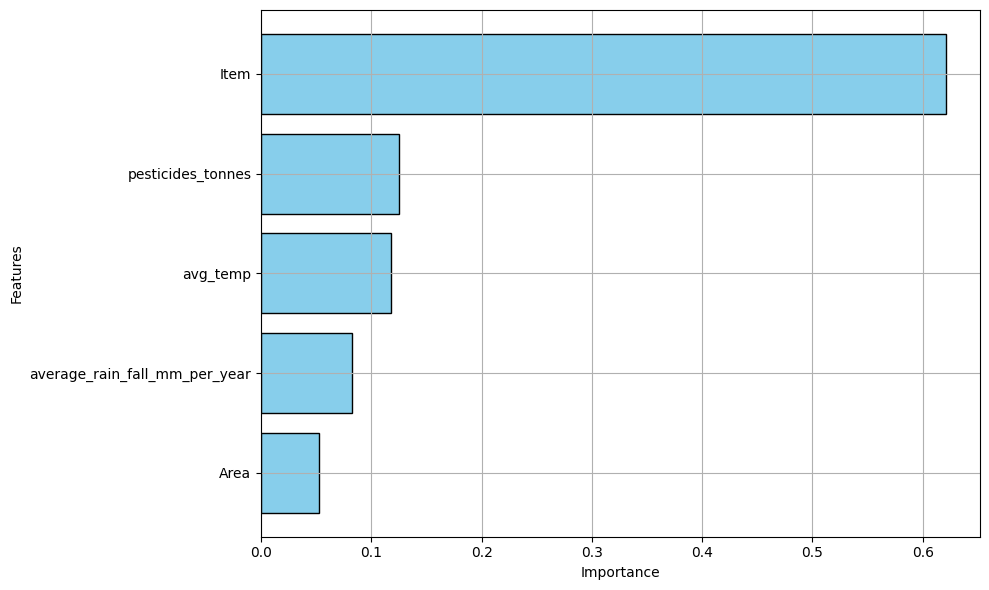

In [131]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rf_score = rf_model.score(X_test,y_test) * 100

print(rf_score)

plt.figure(figsize=(8, 6))
plt.title("Test and prediction difference")
plt.scatter(y_test,y_pred)
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)
sorted_features = [X_orig.columns[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], color="skyblue", edgecolor="black")
plt.yticks(range(len(feature_importances)), sorted_features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

97.45593556692161


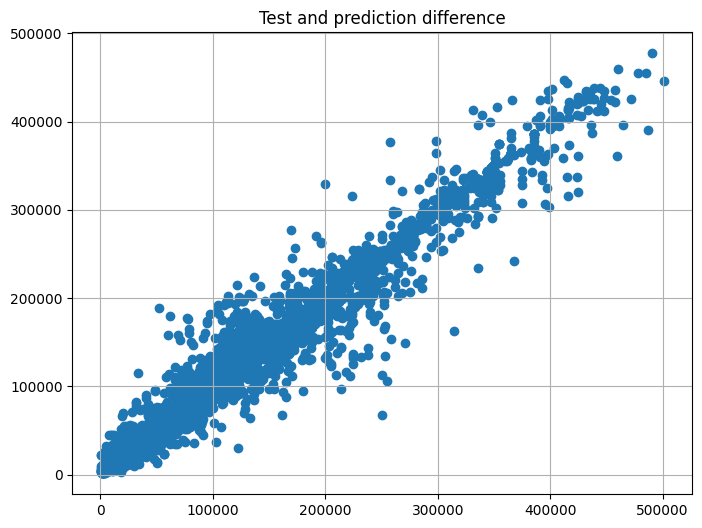

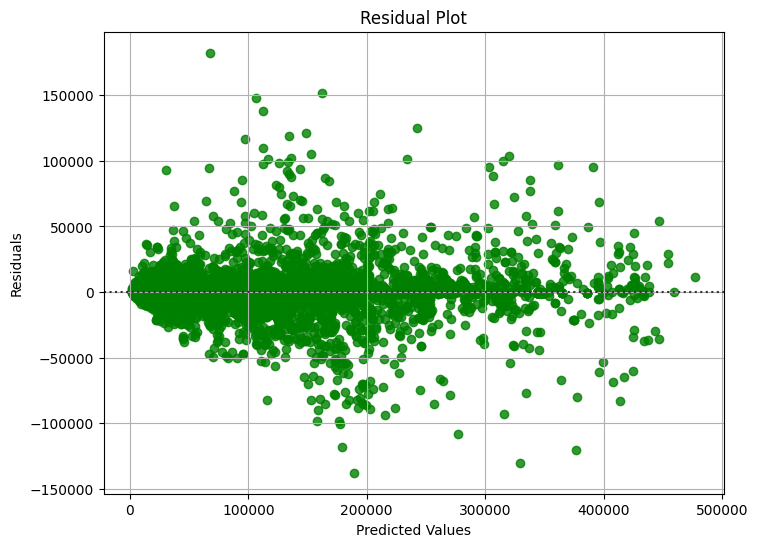

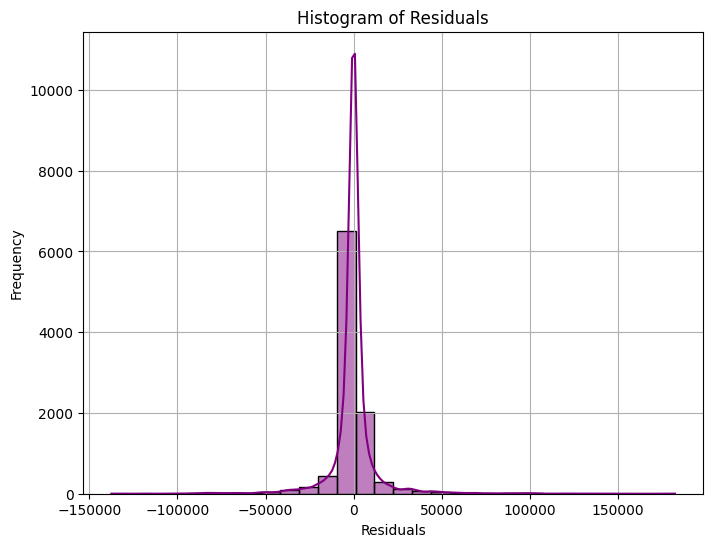

In [132]:
# Naive Bayes 
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()

nb_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
nb_score = rf_model.score(X_test,y_test) * 100

print(nb_score)

plt.figure(figsize=(8, 6))
plt.title("Test and prediction difference")
plt.scatter(y_test,y_pred)
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()